# Example of a junction with N bonds

In [1]:
using CellAdhesion

[Plots](https://github.com/JuliaPlots/Plots.jl) needs to be installed to run these examples and display plots of the data.

In [2]:
using Plots
using Statistics

## Example with constant force

- Define the parameters for the Slip bond model for the junction
- Generate a junction made of 20 bonds
- Run the simulations for the junction subjected to a constant force within the range 2-10, 50 times for each level of force

Define the BondModel to compute the binding-unbinding rate

In [3]:
model = SlipBondModel((k_on_0=3e-3,), (k_off_0=3e-4, f_1e=0.055))

SlipBondModel((k_on_0 = 0.003f0,), (k_off_0 = 0.0003f0, f_1e = 0.055f0))

Define the Cluster data structure parameters

In [4]:
N = 20;      # Number of bonds
l = 1.0;     # Distance between bonds

Define the range of constant forces to be applied

In [5]:
F = [2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0];

Run the Montecarlo simulations for different level of forces, 50 times each

In [6]:
n = 10;            # Number of simulations
n_f = length(F);    # Number of different forces to apply to the junction

time_break_F = zeros(n_f)  # Vector with mean rupture time for the different applied forces

p = plot()

# For loop on the applied Force (F)
for j = 1:1:n_f

    stress_break_v = zeros(n)
    time_break_v = zeros(n)

    # For loop on the different simulations for each scenario (n)
    for sim = 1:1:n

        # Initiate the junction (Cluster data structure)
        x = Cluster(N, l, model, :force_global)

        # Run the Montecarlo simulation until it breaks or it reaches the maximum number of iterations
        state, stress_break_v[sim], time_break_v[sim], step = runcluster(x, F[j], 0.01, max_steps = 500000)

    end

    # Plot all rupture time for all the simulations
    scatter!(p, repeat([F[j]],n), time_break_v, label = "", mc="#1E88E5", ms=4, ma=1)

    # Compute the mean rupture time
    time_break_F[j] = mean(time_break_v)
end

Plot the average rupture time as a function of the applied force

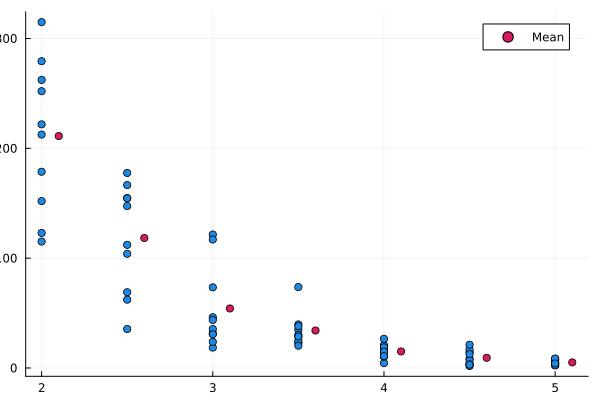

In [7]:
scatter!(p, F.+0.1, time_break_F, label="Mean", mc="#D81B60", ms=4, ma=1)
xlabel!("Force (N)")
ylabel!("Time (s)")

## Example with varing force (linear force variation)

We define force ramps with different deformation rates (0.5%/s, 1%/s, 2%/s, 3%/s)

In [8]:
rates = [0.005, 0.01, 0.02, 0.03]
k = 1   # Spring stiffness

1

Run the Montecarlo simulations for different ramps, 50 times each

In [9]:
n = 20;            # Number of simulations
n_f = length(rates);    # Number of different forces to apply to the junction

time_break_F = zeros(n_f)  # Vector with mean rupture time for the different rates of application
stress_break_F = zeros(n_f)  # Vector with mean rupture stress for the different rates of application

p1 = plot()
p2 = plot()

# For loop on the applied Force (F)
for j = 1:1:n_f

    stress_break_v = zeros(n)
    time_break_v = zeros(n)

    # Generate the force vector
    t = collect(LinRange(0,6000,600001))
    ϵ = rates[j] .* t;

    f = k .* ϵ

    # For loop on the different simulations, for each scenario (n)
    for sim = 1:1:n

        # Initiate the junction (Cluster data structure)
        x = Cluster(N, l, model, :force_global)

        # Run the Montecarlo simulation until it breaks or it reaches the maximum number of iterations
        state, stress_break_v[sim], time_break_v[sim], step = runcluster(x, f, 0.01, max_steps = 500000)

    end

    # Plot all rupture time for all the simulations
    scatter!(p1, repeat([rates[j]*100],n), time_break_v, label = "", mc="#1E88E5", ms=4, ma=1)
    scatter!(p2, repeat([rates[j]*100],n), stress_break_v, label = "", mc="#1E88E5", ms=4, ma=1)

    # Compute the mean rupture time
    time_break_F[j] = mean(time_break_v)
    stress_break_F[j] = mean(stress_break_v)
end

Plot the average rupture time as a function of the applied force

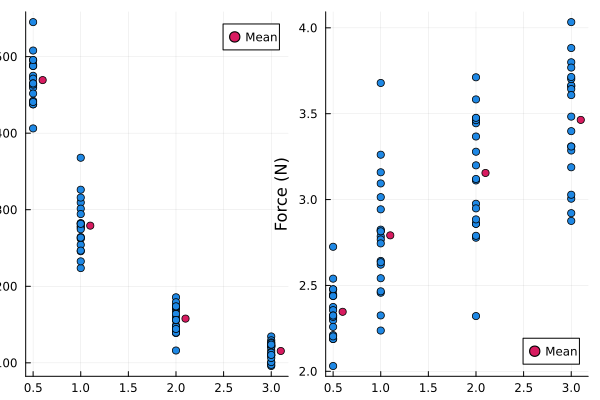

In [10]:
scatter!(p1, (rates.+0.001)*100, time_break_F, label="Mean", mc="#D81B60", ms=4, ma=1)
xlabel!("Rate (%/s)")
ylabel!("Time (s)")

scatter!(p2, (rates.+0.001)*100, stress_break_F, label="Mean", mc="#D81B60", ms=4, ma=1)
xlabel!("Rate (%/s)")
ylabel!("Force (N)")

plot!(p1,p2)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*